<a href="https://colab.research.google.com/github/bhavarth-joshi/test/blob/main/Basic_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Create a sequential model

In [2]:
model = Sequential()

Define input and output data

In [3]:
X_train = np.random.rand(100, 10) # Example data
y_train = np.random.randint(0, 2, (100, 1)) # Example labels

Define the model

In [4]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Working of ReLU?
```
ReLU(x) = max(0, x)
```
The ReLU function is a simple, yet effective way of introducing non-linearity into a neural network. When the input x is positive, the ReLU function simply returns x. This means that any positive values in the input are preserved in the output. When the input x is negative, the ReLU function returns 0. This means that any negative values in the input are "clipped" to 0 in the output. By introducing this non-linearity, the ReLU function allows neural networks to model more complex relationships between the inputs and the outputs.

The ReLU function is computationally efficient, since it involves only simple comparisons and is very fast to compute. Additionally, it helps to mitigate the vanishing gradient problem that can occur with other activation functions, since it allows gradients to flow more easily through the network.



# Working of Sigmoid Function


A sigmoid function is a mathematical function that maps any input value to a value between 0 and 1. The most commonly used sigmoid function is the logistic function, which is defined as:

f(x) = 1 / (1 + e^-x) 

where x is the input to the function, and e is the mathematical constant approximately equal to 2.71828.


The sigmoid activation function is commonly used in the output layer of binary classification problems, where the goal is to classify input data into one of two classes. The sigmoid function has a range between 0 and 1, and can be interpreted as a probability score. So, in binary classification problems, the output of the sigmoid function can be interpreted as the probability of the input belonging to the positive class. If this probability is above a certain threshold, the input is classified as belonging to the positive class; otherwise, it is classified as belonging to the negative class.

It's worth noting that the sigmoid function can also be used in the hidden layers of a neural network, but its use has been largely replaced by the ReLU activation function. The ReLU function is computationally efficient and has been shown to perform better than the sigmoid function in deep neural networks, where there are many layers.

In summary, the sigmoid activation function is commonly used in the output layer of binary classification problems, because it produces output in the range of probabilities and allows easy classification of input into one of two classes.

Compile the model

In [5]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


After building a neural network model, it is necessary to specify the loss function, optimizer, and evaluation metrics before training the model. This step is known as model compilation.

In the given code, the model is being compiled using the `compile()` function. The `compile()` function accepts several arguments to configure the model for training, including the loss function, optimizer, and metrics.


* `loss` is a function that measures the difference between the predicted and actual output. In binary classification problems, `binary_crossentropy` is a commonly used loss function. It measures the difference between the predicted probability distribution and the actual probability distribution of the binary class labels.
 * `optimizer` is an algorithm used to update the weights of the neural network during training. In this case, the `Adam` optimizer is being used with a learning rate of 0.001. Adam is a popular optimization algorithm that uses adaptive learning rates to update the weights.
 * `metrics` are used to evaluate the performance of the model during training and testing. In this case, `accuracy` is being used as the evaluation metric. It measures the fraction of correctly classified samples out of the total number of samples.





# Fit the model to training data

In [6]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 3s 6ms/step - loss: 0.7126 - accuracy: 0.4700
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.4600
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7061 - accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.5400
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4800
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.4900
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5200
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5300
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4700
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4600


The `fit()` function is used to train a neural network model. The function accepts several arguments, including the training data, labels, number of epochs, and batch size. Here's what each argument means:
*   `X_train` is the input data used for training the model.
*   `y_train` is the target labels for the input data used for training the model.
*   `epochs` is the number of times the training data will be passed through the neural network model. In this case, the model will be trained for 10 epochs.
*   `batch_size` is the number of training examples used in one iteration of gradient descent. In this case, the batch size is set to 32. This means that the model will be updated after every 32 training examples.

During training, the fit() function will repeatedly pass the training data and labels through the neural network, compute the loss function and optimize the model using the backpropagation algorithm. The model will adjust its weights to minimize the loss function and improve its accuracy. The training process will continue for the specified number of epochs or until convergence.

In [7]:
# Use the model to make predictions
X_test = np.random.rand(10, 10) # Example test data
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


# Now print the accuracy

In [14]:
y_test = np.random.randint(0, 2, (10, 1)) # Example labels

In [15]:
# Convert probabilities to class labels
y_pred = (y_pred > 0.5)

# Calculate accuracy on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy metric
print("Accuracy: ", accuracy)

Accuracy:  0.5


# Creating a Multi layer Perceptron

Problem: Given a dataset of flower samples with four input features (sepal length, sepal width, petal length, and petal width), build a machine learning model to classify each flower sample into one of three species: setosa, versicolor, or virginica.

Dataset: The Iris dataset from scikit-learn's datasets module is used for this problem. The dataset contains 150 samples with 4 input features and 3 output classes.

In [16]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Build the MLP classifier model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy metric
print("Accuracy: ", accuracy)

Accuracy:  0.9777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Creating a CNN


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer to convert the 2D feature maps to 1D feature vectors
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(units=128, activation='relu'))

# Add the output layer with softmax activation for classification
model.add(Dense(units=10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Polt the architecture

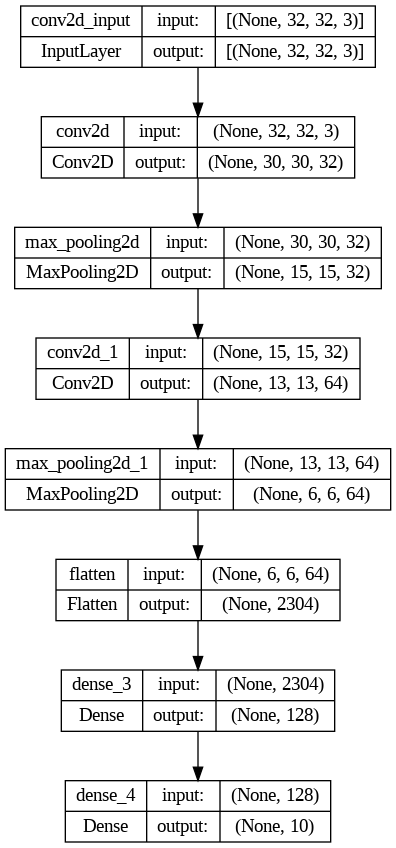

In [18]:
from keras.utils import plot_model

plot_model(model, to_file='basic_cnn.png', show_shapes=True)

In [20]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (3,109 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [24]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import cv2
import pytesseract

# Load the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PXL_20230501_060044697.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphology to remove noise and connect text regions
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Detect text using Pytesseract
text = pytesseract.image_to_string(morph)

# Print the extracted text
print(text)

 

 

 

 

 

'

ery

See atL

as

ae ae gt

ee

 

